2024-12-11 06:54:28.175721: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-11 06:54:28.175750: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-11 06:54:28.175756: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-11 06:54:28.176034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-11 06:54:28.176047: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


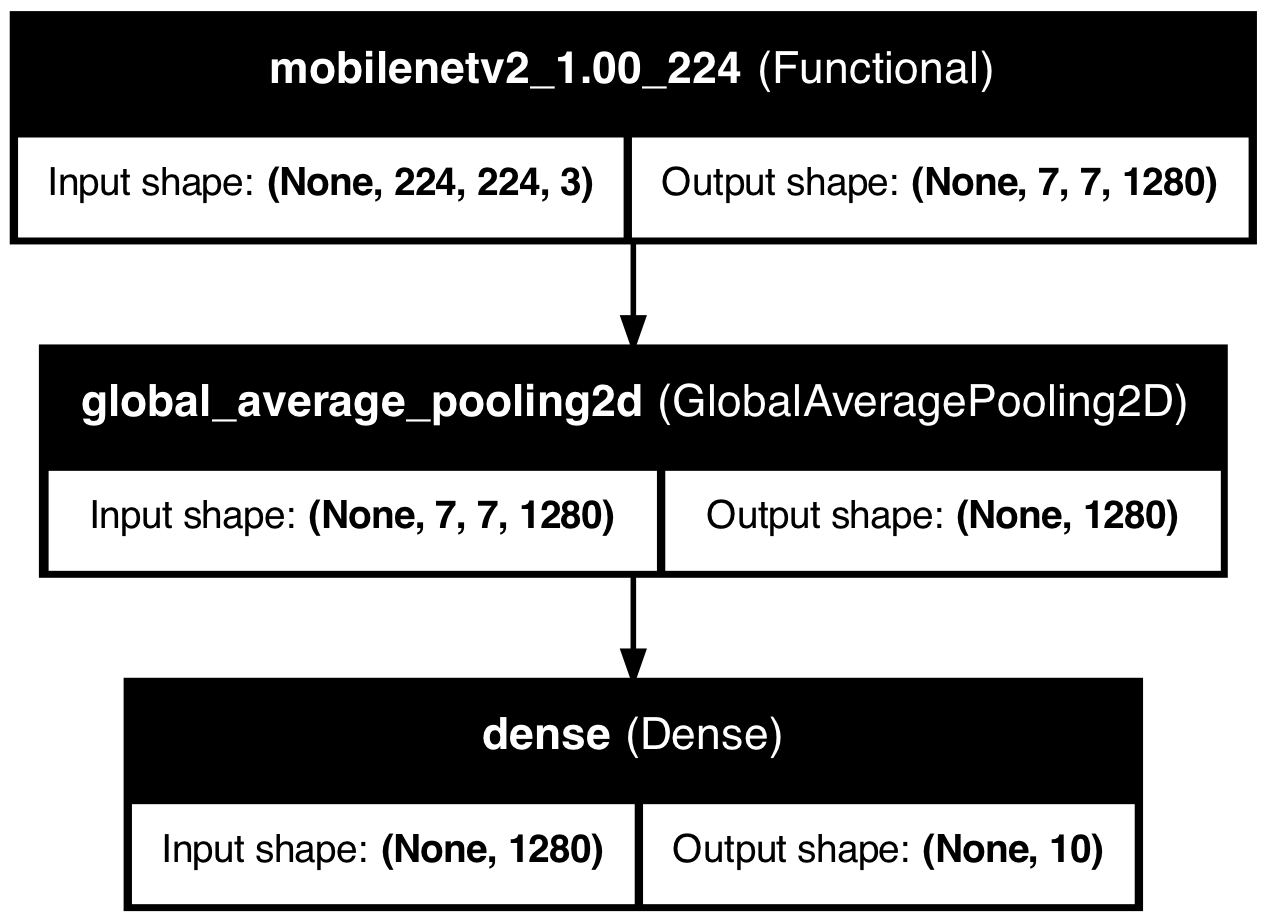

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Load MobileNetV2 base model and modify for CIFAR-10
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet', 
    input_shape=(224, 224, 3), 
    include_top=False
)

# Freeze the base model
base_model.trainable = False

# Create the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Plot the model architecture to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


implemented test and val

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:


# Load CIFAR-10 dataset and split into training, validation, and test sets
train_ds = tfds.load('cifar10', split='train[:40000]', as_supervised=True)
val_ds = tfds.load('cifar10', split='train[40000:]', as_supervised=True)
test_ds = tfds.load('cifar10', split='test', as_supervised=True)

In [24]:


# Preprocess the images for training, validation, and testing
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize image to MobileNetV2 input size
    image = image / 255.0  # Normalize image to range [0, 1]
    return image, label

# Apply preprocessing and batch the datasets
batch_size = 32

train_ds = train_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Load MobileNetV2 base model and modify for CIFAR-10
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet', 
    input_shape=(224, 224, 3), 
    include_top=False
)

# Freeze the base model
base_model.trainable = False

# Create the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor (e.g., validation loss)
    patience=10,              # Number of epochs with no improvement after which training will stop
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored metric
)

# Train the model with validation data
print("Training the model on CIFAR-10 images...")
model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# Save the trained model
model.save('mobilenet_cifar10.h5')
print("Model saved successfully.")

Training the model on CIFAR-10 images...
Epoch 1/10


2024-12-06 21:05:40.928473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 251s 197ms/step - accuracy: 0.6816 - loss: 0.9357 - val_accuracy: 0.7794 - val_loss: 0.6230
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 253s 202ms/step - accuracy: 0.8009 - loss: 0.5651 - val_accuracy: 0.7908 - val_loss: 0.5858
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 272s 217ms/step - accuracy: 0.8203 - loss: 0.5176 - val_accuracy: 0.7984 - val_loss: 0.5750
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 292s 233ms/step - accuracy: 0.8313 - loss: 0.4895 - val_accuracy: 0.8011 - val_loss: 0.5731
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 270s 216ms/step - accuracy: 0.8387 - loss: 0.4699 - val_accuracy: 0.8009 - val_loss: 0.5752
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 260s 208ms/step - accuracy: 0.8440 - loss: 0.4549 - val_accuracy: 0.8020 - val_loss: 0.5793
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 262s 209ms/step - accuracy: 0.8475 - loss: 0.4430 - val_accuracy: 0.8018 - val_loss: 0.5845
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 268s 214ms/step - accuracy: 0.8

Model saved successfully.


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

In [3]:
# Load the Keras model (.h5)
MODEL_PATH = './models/mobilenet_cifar10_pca200.h5'
model = tf.keras.models.load_model(MODEL_PATH)

2024-12-11 04:09:53.202225: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-11 04:09:53.202260: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-11 04:09:53.202264: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-11 04:09:53.202305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-11 04:09:53.202320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
try:
    # Dynamic range quantization
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_quantized_model = converter.convert()

    # Save the quantized model
    with open('./models/model_pca_quantized.tflite', 'wb') as f:
        f.write(tflite_quantized_model)
    
    print("Model quantized and saved successfully!")
except Exception as e:
    print(f"Error during quantization: {str(e)}")


INFO:tensorflow:Assets written to: /var/folders/vn/wqnbzxts16s809wcqq_0ydm80000gn/T/tmpr87ox24j/assets


INFO:tensorflow:Assets written to: /var/folders/vn/wqnbzxts16s809wcqq_0ydm80000gn/T/tmpr87ox24j/assets


: 